## Exploratory Data Analysis

In [1]:
#Libraries used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'ticks')
%matplotlib inline

In [2]:
#Loading train dataset
df_train = pd.read_csv('train.csv')
df_train.head()
df_train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

In [3]:
#Loading test dataset
df_test = pd.read_csv('test.csv')
df_test.head()
df_test.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

In [4]:
#We have 177 null values in column age, 687 in column cabin and 2 in column embarked
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#We have 86 null values in column age, 327 in column cabin and 1 in column fare
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Filter of the null values and imputation for age mean
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean()).astype('int64')

In [7]:
#Filter of the null values and imputation for age mean
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean()).astype('int64')

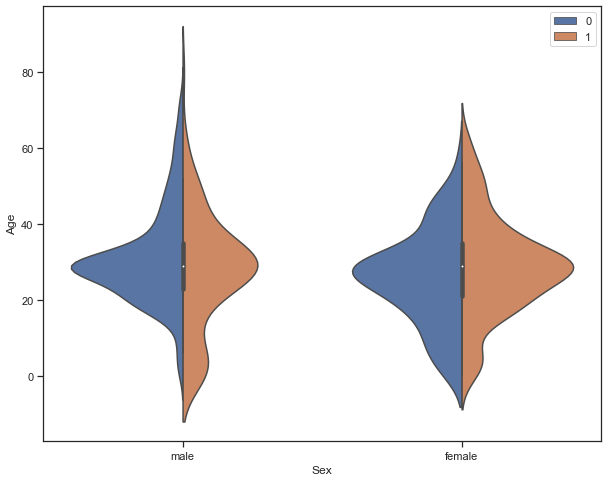

In [8]:
fig = plt.figure(figsize = (10,8))
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df_train, split = True)
#plt.legend + ; for doesn't display some informations about matplotlib
plt.legend();

### As we can see womans survive more than mans, the years old average is around 30 and there is more outliers in the mans group than womans group  

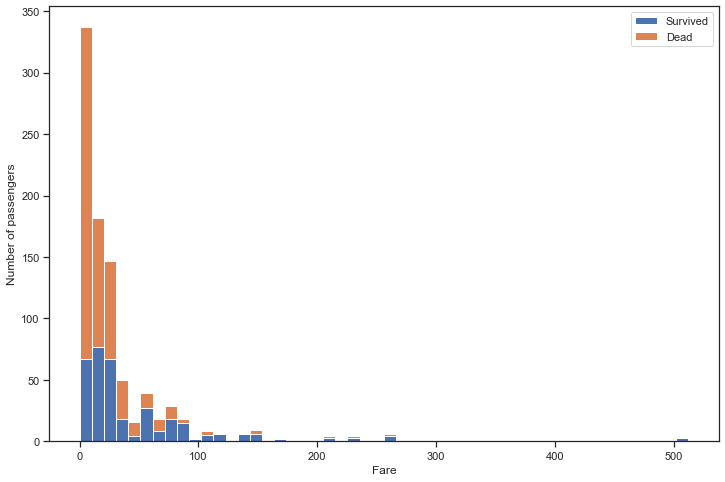

In [9]:
fig = plt.figure(figsize = (12,8))

plt.hist([df_train[df_train['Survived'] == 1]['Fare'], df_train[df_train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
#plt.legend + ; for doesn't display some informations about matplotlib
plt.legend();

### The higher the value of the fare the greater chances of you to survive

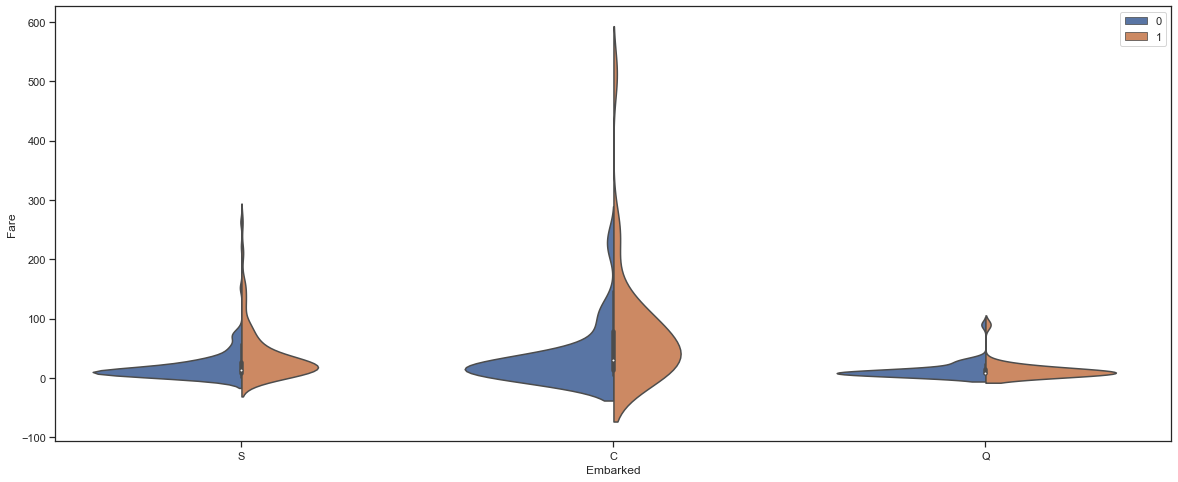

In [10]:
fig = plt.figure(figsize = (20,8))

sns.violinplot(x = 'Embarked', y = 'Fare', hue = 'Survived', data = df_train, split = True)
#plt.legend + ; for doesn't display some informations about matplotlib
plt.legend();

### People who embarked in class C survived more than all classes, therefore that confirms what we thought that higher the value of the fare the greater chances of you to survive

# Preprocessing

In [11]:
#That function is used to know whether a feature was processed or not
def status(feature):
    print('Processing', feature, ': ok')

In [12]:
#Let's create a fuction to together our datasets (train and test) and to select the features of model

def get_combined_data():
    #That feature will be used in model
    train = df_train[['Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'Survived']].copy()
    test = df_test[['Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']].copy()
    
    #Dropping the target will predict
    train.drop(['Survived'], 1, inplace = True)
    
    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop(['index'], inplace = True, axis = 1)
    
    return combined

combined = get_combined_data()
combined.shape

(1309, 6)

In [13]:
#Let’s impute the missing fare value by the average fare computed on the train set

def imputer_fare(combined):
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace = True)
    status('Fare')
    return combined

combined = imputer_fare(combined)

Processing Fare : ok


In [14]:
#Let's replaces the two missing values of Embarked with the most frequent Embarked value.

def imputer_embarked(combined):
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    
    return combined

combined = imputer_embarked(combined)

Processing Embarked : ok


In [15]:
#This function maps the string values male and female to 1 and 0 respectively.

def imputer_sex(combined):
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

combined = imputer_sex(combined)

Processing Sex : ok


In [16]:
#As we can see have not null values anymore
combined.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Machine learning

In [17]:
#Importing metric to evaluate our model
from sklearn.model_selection import cross_val_score

#That function is used to calculate our score using Cross-validation
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [18]:
#That function is used basically to split our data
def recover_train_test_target(combined):
    targets = df_train.Survived
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

train, test, targets = recover_train_test_target(combined)

In [19]:
#Importing machine learning model
from sklearn.ensemble import RandomForestClassifier

#Here we train our model using train data and target data
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

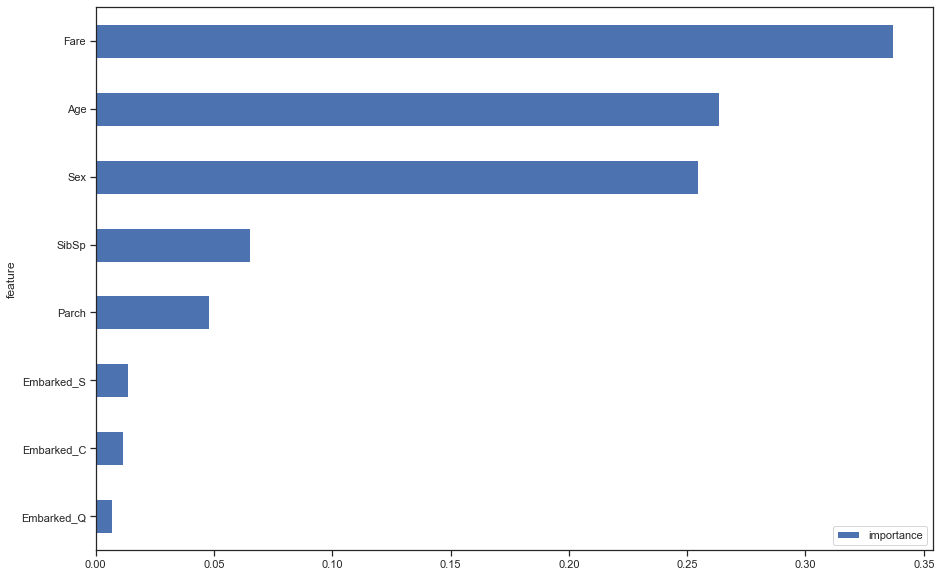

In [20]:
#Here we analyze the important feature to our model 
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(15, 10))
plt.legend();

In [21]:
#Importing an algorithm to select features based on importance weights
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit = True)

#We apply it in data train
train_reduced = model.transform(train)
train_reduced.shape

(891, 3)

> ## Let’s try different base models

In [22]:
#Importing three machine learning models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

rfc = RandomForestClassifier()
lr = LogisticRegression()
lrcv = LogisticRegressionCV()
gbc = GradientBoostingClassifier()

In [23]:
%%time
models_for_test = [rfc, lr, lrcv, gbc]

for model in models_for_test:
    print('Cross validation of: {0}'.format(model.__class__))
    score = compute_score(clf = model, X=train_reduced, y = targets, scoring = 'accuracy')
    print('Cross validation = {0}'.format(score))
    print('\n')

Cross validation of: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Cross validation = 0.769993052666744


Cross validation of: <class 'sklearn.linear_model.logistic.LogisticRegression'>
Cross validation = 0.7822332679737867


Cross validation of: <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
Cross validation = 0.7822332679737867


Cross validation of: <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
Cross validation = 0.8002299109826382


Wall time: 1.95 s


### As we can see the best performance was model Gradient Boosting Classifier, but when we submitted result on Kaggle we have a bad performance, then we will use the model Random Forest Classifier because he works better than others

> ## Let's create an output file to submit on Kaggle 

In [24]:
model_final = RandomForestClassifier(n_estimators = 10)
model_final.fit(train, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
predict = model_final.predict(test).astype(int)

In [26]:
df_submission = pd.read_csv('test.csv', usecols = ['PassengerId'])
df_submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [27]:
df_submission['Survived'] = predict
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [28]:
#df_submission.to_csv('third_submission',index = False)

### I got 0.77511 score on Kaggle, getting in top 57 %